## Activation Maximization

Lesson has been changed and updated for Tensorflow 2.0

https://github.com/keisen/tf-keras-vis/blob/master/examples/visualize_dense_layer.ipynb

In [9]:
%reload_ext autoreload
%autoreload 2

import tensorflow as tf
from tf_keras_vis.utils import print_gpus

print_gpus()

0 GPUs


## Load VGG16, a pretrained imagenet model

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model

# Load model
model = Model(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Visualizing a specific output category

**ActivationMaximization** will maximize the value that is computed by the loss function passed as argument. Here, we try to visualize a category as defined No.20 (ouzel) of imagenet.

[!NOTE] The softmax activation function which is applied to model's last layer may obstruct generating shape images, so that you need to replace the function to a linear function using model_modifier.

Steps: 100	Losses: [125.81570434570312],	Regularizations: [('TotalVariation', 90.35606384277344), ('L2Norm', 0.025609174743294716)]
Steps: 200	Losses: [197.79159545898438],	Regularizations: [('TotalVariation', 93.89913940429688), ('L2Norm', 0.02545984648168087)]


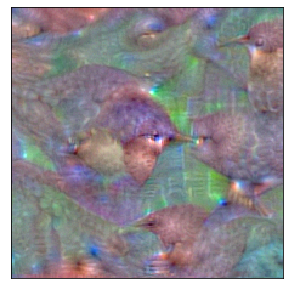

In [11]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras import backend as K
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.utils.callbacks import Print

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# Create Activation Maximization object
activation_maximization = ActivationMaximization(model, model_modifier)

# Define loss function. 20 is the imagenet index corresponding to ouzel.
loss = lambda x: K.mean(x[:, 20])

# Generate max activation with debug printing
activation = activation_maximization(loss, callbacks=[Print(interval=100)])
image = activation[0].astype(np.uint8)

f, ax = plt.subplots(figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
plt.show()

Let's see if we can get better results with more iterations and generate a GIF as it evolves

In [12]:
from tf_keras_vis.utils.callbacks import GifGenerator

# Do 500 iterations and Generate an optimizing animation
activation = activation_maximization(loss,
                                     steps=512,
                                     callbacks=[ Print(interval=100),
                                                 GifGenerator('images/activation_maximization')])
image = activation[0].astype(np.uint8)

f, ax = plt.subplots(figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
plt.show()

Steps: 100	Losses: [137.27935791015625],	Regularizations: [('TotalVariation', 87.05181121826172), ('L2Norm', 0.025591375306248665)]
Steps: 200	Losses: [244.4339599609375],	Regularizations: [('TotalVariation', 99.19427490234375), ('L2Norm', 0.02542869932949543)]
Steps: 300	Losses: [296.3731994628906],	Regularizations: [('TotalVariation', 107.99679565429688), ('L2Norm', 0.025283876806497574)]
Steps: 400	Losses: [283.322265625],	Regularizations: [('TotalVariation', 108.83818054199219), ('L2Norm', 0.02515660971403122)]
Steps: 500	Losses: [294.36651611328125],	Regularizations: [('TotalVariation', 105.03105926513672), ('L2Norm', 0.025105057284235954)]


FileNotFoundError: The directory "C:\\Users\\Rajeev\\DeepLearningCV\\ 9. Visualizing What CNNs 'see' & Filter Visualization\\images" does not exist